In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [10]:
bank=pd.read_csv("bank-full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
bank['yy']=bank.y.map({'no':0,'yes':1})
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campign,pdays,previous,poutcome,y,yy
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,0


In [4]:
bank.head(4000)
bank.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campign      0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

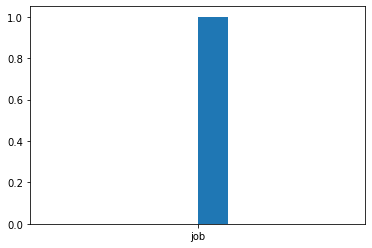

In [6]:
plt.hist('job')

In [7]:
bank.drop(["job"],inplace=True,axis = 1)

In [8]:
bank

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campign,pdays,previous,poutcome,y
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<AxesSubplot:xlabel='duration', ylabel='count'>

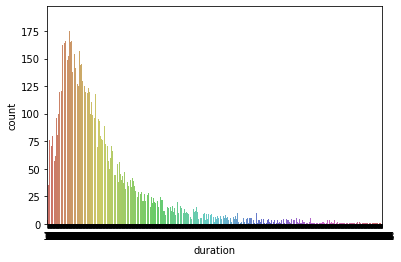

In [9]:
sb.countplot(x="duration",data=bank,palette="hls")

<AxesSubplot:xlabel='balance', ylabel='duration'>

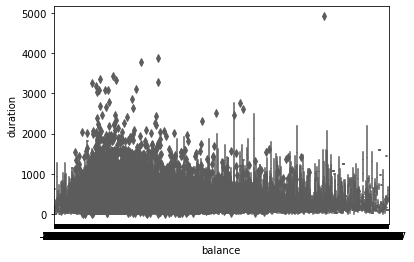

In [10]:
sb.boxplot(x="balance",y="duration",data=bank,palette="hls")

In [11]:
pd.crosstab(bank.balance,bank.duration)  

duration,0,1,2,3,4,5,6,7,8,9,...,3102,3183,3253,3284,3322,3366,3422,3785,3881,4918
balance,,,,,,,,,,,,,,,,,,,,,
-8019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-6847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-4057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(bank.balance,bank.duration).plot(kind = 'bar')

In [ ]:
bank.isnull().sum()

In [ ]:
bank["balance"].fillna(1,inplace=True) 
bank["day"].fillna(1,inplace=True) 
bank["duration"].fillna(0,inplace=True) 

In [ ]:
bank.balance.mode()
bank.day.mode()
bank.duration.mode()
bank.pdays.mode()

In [ ]:
bank.balance.fillna(28.4144,inplace=True)

In [ ]:
bank.isnull().sum()  

In [ ]:
from sklearn.linear_model import LogisticRegression
bank.shape

In [ ]:
X = bank.iloc[:,[1,2,3,4,5]]
Y = bank.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y) 

In [ ]:
classifier.coef_

In [ ]:
classifier.predict_proba (X)

In [ ]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank

In [ ]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

In [ ]:
pd.crosstab(y_pred,Y)

In [ ]:
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

In [ ]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

In [ ]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [ ]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [ ]:
y_prob1 

In [ ]:
import statsmodels.api as sm   

In [ ]:
logit = sm.Logit(Y, X)   

In [ ]:
logit.fit().summary()  

In [ ]:
fpr

In [ ]:
tpr